# Previsão de cancelamentos em Hotéis

### Sumário - Processamento dos Dados

a) Aquisição de dados

b) Importação das bibliotecas

c) Lendo os arquivos

d) Analisando as features do nosso dataset

e) Feature engineering

f) Salvando os arquivos para as próximas etapas

g) Análise Exploratória

---

##### a) Aquisição de dados

- Os dados baixados podem ser encontrados neste link aqui <br>
https://dhauz-challenges.s3.amazonaws.com/cancellation_prediction.rar

#### b) Importação das bibliotecas

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, '../') # set home directory
from src.funcs import *

import warnings
warnings.filterwarnings("ignore")

#### c) Lendo os arquivos

In [2]:
df_raw = pd.read_csv('../data/raw/cancellation_prediction.csv')
df_raw

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,...,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
0,Fancy Hotel,0,342,2015,July,27,1,0,0,2,...,0,C,3,No Deposit,NaN,NaN,0,0.00,0,0
1,Fancy Hotel,0,737,2015,July,27,1,0,0,2,...,0,C,4,No Deposit,NaN,NaN,0,0.00,0,0
2,Fancy Hotel,0,7,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,NaN,NaN,0,75.00,0,0
3,Fancy Hotel,0,13,2015,July,27,1,0,1,1,...,0,A,0,No Deposit,304.0,NaN,0,75.00,0,0
4,Fancy Hotel,0,14,2015,July,27,1,0,2,2,...,0,A,0,No Deposit,240.0,NaN,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Hotel,0,23,2017,August,35,30,2,5,2,...,0,A,0,No Deposit,394.0,NaN,0,96.14,0,0
119386,Hotel,0,102,2017,August,35,31,2,5,3,...,0,E,0,No Deposit,9.0,NaN,0,225.43,0,2
119387,Hotel,0,34,2017,August,35,31,2,5,2,...,0,D,0,No Deposit,9.0,NaN,0,157.71,0,4
119388,Hotel,0,109,2017,August,35,31,2,5,2,...,0,A,0,No Deposit,89.0,NaN,0,104.40,0,0


#### d) Analisando as features do nosso dataset

In [3]:
df_raw.columns

Index(['type', 'cancellation', 'days_between_booking_arrival',
       'year_arrival_date', 'month_arrival_date', 'week_number_arrival_date',
       'day_of_month_arrival_date', 'num_weekend_nights',
       'num_workweek_nights', 'num_adults', 'num_children', 'num_babies',
       'breakfast', 'country', 'market_segment', 'distribution_channel',
       'repeated_guest', 'num_previous_cancellations', 'num_previous_stays',
       'reserved_room', 'changes_between_booking_arrival', 'deposit_policy',
       'id_travel_agency_booking', 'id_person_booking', 'customer_type',
       'avg_price', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

Considerações:
Três colunas chamaram a atenção: "day_of_month_arrival_date", "month_arrival_date", "year_arrival_date". Podendo virar uma coluna de data posteriormente

##### Valores Nulos

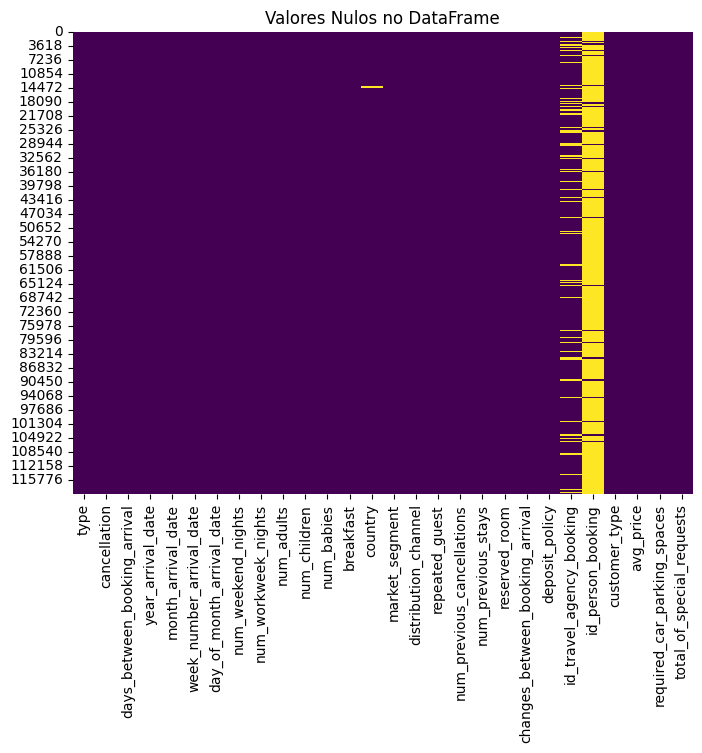

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_raw.isnull(), cmap="viridis", cbar=False)
plt.title("Valores Nulos no DataFrame")
plt.show()

In [5]:
# Resumo
check_nan(df_raw, df_raw.columns)

,feature,type,missing_total,percentage %
23,id_person_booking,float64,112593,94.307
22,id_travel_agency_booking,float64,16340,13.686
13,country,object,488,0.409
10,num_children,float64,4,0.003
0,type,object,0,0.000
15,distribution_channel,int64,0,0.000
26,required_car_parking_spaces,int64,0,0.000
25,avg_price,float64,0,0.000
24,customer_type,int64,0,0.000
21,deposit_policy,object,0,0.000


Considerações:
Colunas "id_person_booking" e "id_travel_agency_booking" com uma porcentagem bastante alta de valores nulos, e ainda são colunas de identificação, logo assumo que não terão impacto no modelo.. podendo ser removidas do nosso dataset. Ainda temos as variáveis de "country" e "num_children" a serem tratadas, e como a % de valores nulos está baixa para ambas, irei tratá-las de outra maneira.

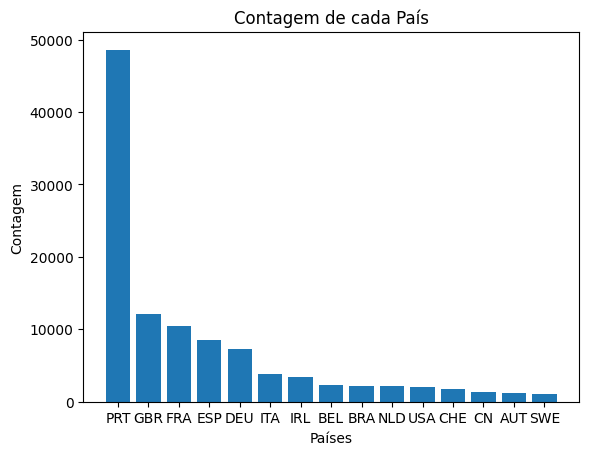

,country,contagem,porcentagem %
0,PRT,48590,40.698551
1,GBR,12129,10.159142
2,FRA,10415,8.723511
3,ESP,8568,7.176480
4,DEU,7287,6.103526
...,...,...,...
172,DJI,1,0.000838
173,BWA,1,0.000838
174,HND,1,0.000838
175,VGB,1,0.000838


In [6]:
# country
df_country = df_raw['country'].value_counts().reset_index()
df_country.columns = ['country', 'contagem']
df_country['porcentagem %'] = (df_country['contagem'] / len(df_raw)) * 100

plt.bar(df_country['country'].head(15), df_country['contagem'].head(15))
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.title('Contagem de cada País')
plt.show()

df_country

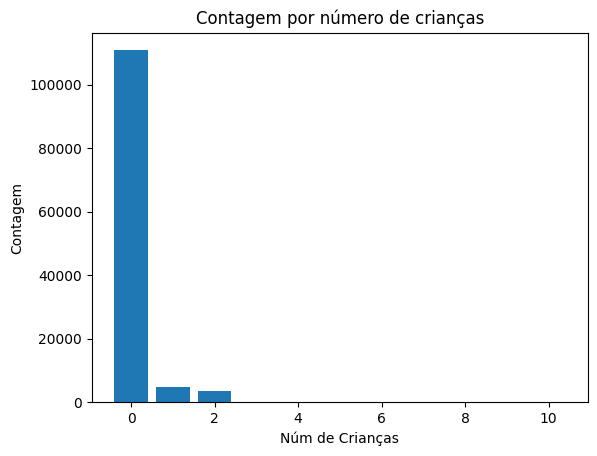

,num_children,contagem,porcentagem %
0,0.0,110796,92.801742
1,1.0,4861,4.071530
2,2.0,3652,3.058883
3,3.0,76,0.063657
4,10.0,1,0.000838


In [7]:
# num_children
df_children = df_raw['num_children'].value_counts().reset_index()
df_children.columns = ['num_children', 'contagem']
df_children['porcentagem %'] = (df_children['contagem'] / len(df_raw)) * 100

plt.bar(df_children['num_children'], df_children['contagem'])
plt.xlabel('Núm de Crianças')
plt.ylabel('Contagem')
plt.title('Contagem por número de crianças')
plt.show()

df_children

Considerações:
Ambas conseguem ter apenas uma variável que se destaca das outras em questão de quantidade, então apenas completarei os valores nulos das duas colunas com os valores que mais aparecem para elas, sendo "PRT" para a coluna "country" e 0 para a coluna "num_children"

##### Tipo dos valores em colunas categóricas

In [8]:
cols_numericas = df_raw.select_dtypes(include=['int', 'float']).columns

df_sem_numericas = df_raw.drop(columns=cols_numericas)
print(df_sem_numericas.dtypes)
df_sem_numericas

type                  object
month_arrival_date    object
breakfast               bool
country               object
reserved_room         object
deposit_policy        object
dtype: object


,type,month_arrival_date,breakfast,country,reserved_room,deposit_policy
0,Fancy Hotel,July,True,PRT,C,No Deposit
1,Fancy Hotel,July,True,PRT,C,No Deposit
2,Fancy Hotel,July,True,GBR,A,No Deposit
3,Fancy Hotel,July,True,GBR,A,No Deposit
4,Fancy Hotel,July,True,GBR,A,No Deposit
...,...,...,...,...,...,...
119385,Hotel,August,True,BEL,A,No Deposit
119386,Hotel,August,True,FRA,E,No Deposit
119387,Hotel,August,True,DEU,D,No Deposit
119388,Hotel,August,True,GBR,A,No Deposit


Considerações: Única transformação a ser feita pelos valores observados será transformar a coluna "breakfast" para o tipo "int" onde True é igual a 1 e False é igual a 0, além de juntar as colunas "month_arrival_date" e 

##### Transformações

In [9]:
# Completando valores nulos
df_raw['country'] = df_raw['country'].fillna(df_country['country'].values[0])
df_raw['num_children'] = df_raw['num_children'].fillna(df_children['num_children'].values[0])

# Criação da coluna de data
meses_mapping = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6,
                 'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12}

df_raw['month_arrival_date'] = df_raw['month_arrival_date'].str.lower().map(meses_mapping)
df_raw['date'] = pd.to_datetime(df_raw['year_arrival_date'].astype(str) + '-' + df_raw['month_arrival_date'].astype(str).str.zfill(2) + '-' + df_raw['day_of_month_arrival_date'].astype(str).str.zfill(2))

# Alterando os tipos das colunas
df_raw['breakfast'] = np.where(df_raw.breakfast==True,1, 0)

# Remoção de colunas 
df_raw = df_raw.drop(['id_person_booking','id_travel_agency_booking','year_arrival_date', 
    'month_arrival_date', 'day_of_month_arrival_date'], axis=1)
df_raw

,type,cancellation,days_between_booking_arrival,week_number_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,breakfast,...,num_previous_cancellations,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,date
0,Fancy Hotel,0,342,27,0,0,2,0.0,0,1,...,0,0,C,3,No Deposit,0,0.00,0,0,2015-07-01
1,Fancy Hotel,0,737,27,0,0,2,0.0,0,1,...,0,0,C,4,No Deposit,0,0.00,0,0,2015-07-01
2,Fancy Hotel,0,7,27,0,1,1,0.0,0,1,...,0,0,A,0,No Deposit,0,75.00,0,0,2015-07-01
3,Fancy Hotel,0,13,27,0,1,1,0.0,0,1,...,0,0,A,0,No Deposit,0,75.00,0,0,2015-07-01
4,Fancy Hotel,0,14,27,0,2,2,0.0,0,1,...,0,0,A,0,No Deposit,0,98.00,0,1,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Hotel,0,23,35,2,5,2,0.0,0,1,...,0,0,A,0,No Deposit,0,96.14,0,0,2017-08-30
119386,Hotel,0,102,35,2,5,3,0.0,0,1,...,0,0,E,0,No Deposit,0,225.43,0,2,2017-08-31
119387,Hotel,0,34,35,2,5,2,0.0,0,1,...,0,0,D,0,No Deposit,0,157.71,0,4,2017-08-31
119388,Hotel,0,109,35,2,5,2,0.0,0,1,...,0,0,A,0,No Deposit,0,104.40,0,0,2017-08-31


#### e) Feature engineering
- A partir deste ponto, será construído um novo DataFrame com dados prontos para aplicação em modelagem: df_clean

##### Encoding de variáveis categóricas

Processo feito para facilitar na hora de testar diversos modelos de classificação

In [10]:
# Seleção das colunas que serão codificadas
cols_enc = ['type', 'country', 'reserved_room', 'deposit_policy']
df_clean = cat_encoder(df_raw, cols_enc)
df_clean

,type,cancellation,days_between_booking_arrival,week_number_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,breakfast,...,num_previous_cancellations,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,date
0,0,0,342,27,0,0,2,0.0,0,1,...,0,0,2,3,0,0,0.00,0,0,2015-07-01
1,0,0,737,27,0,0,2,0.0,0,1,...,0,0,2,4,0,0,0.00,0,0,2015-07-01
2,0,0,7,27,0,1,1,0.0,0,1,...,0,0,0,0,0,0,75.00,0,0,2015-07-01
3,0,0,13,27,0,1,1,0.0,0,1,...,0,0,0,0,0,0,75.00,0,0,2015-07-01
4,0,0,14,27,0,2,2,0.0,0,1,...,0,0,0,0,0,0,98.00,0,1,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,35,2,5,2,0.0,0,1,...,0,0,0,0,0,0,96.14,0,0,2017-08-30
119386,1,0,102,35,2,5,3,0.0,0,1,...,0,0,4,0,0,0,225.43,0,2,2017-08-31
119387,1,0,34,35,2,5,2,0.0,0,1,...,0,0,3,0,0,0,157.71,0,4,2017-08-31
119388,1,0,109,35,2,5,2,0.0,0,1,...,0,0,0,0,0,0,104.40,0,0,2017-08-31


##### Normalização de variáveis numéricas

Processo feito para padronizar as escalas das variáveis. Isso é importante porque muitos algoritmos de aprendizado de máquina são sensíveis à escala dos dados, porém não são todos. Devido à isso, iremos testar nossos modelos com dados normalizados e não normalizados.

In [11]:
# Quais colunas normalizar? 
stats = df_clean.describe().transpose()
qtd_unicos = df_clean.nunique().rename('qtd_unicos')

# Juntando as estatísticas e a quantidade de valores únicos
resultado = pd.concat([qtd_unicos, stats[['min', 'max']]], axis=1).reset_index()
resultado

,index,qtd_unicos,min,max
0,type,2,0.0,1.0
1,cancellation,2,0.0,1.0
2,days_between_booking_arrival,479,0.0,737.0
3,week_number_arrival_date,53,1.0,53.0
4,num_weekend_nights,17,0.0,19.0
5,num_workweek_nights,35,0.0,50.0
6,num_adults,14,0.0,55.0
7,num_children,5,0.0,10.0
8,num_babies,5,0.0,10.0
9,breakfast,2,0.0,1.0


Considerações: Colunas do tipo booleano não precisam ser normalizadas, já as outras cabem sim a normalização

In [12]:
# Excluindo colunas da normalização
cols_exc = list(resultado[resultado.qtd_unicos == 2]['index'].values)
cols_exc.append('date')
df_norm = norm_features(df_clean, cols_exc)
df_norm

,type,cancellation,days_between_booking_arrival,week_number_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,breakfast,...,num_previous_cancellations,num_previous_stays,reserved_room,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,date
0,0,0,0.464043,0.500000,0.000000,0.00,0.036364,0.0,0.0,1,...,0.0,0.0,0.222222,0.142857,0.0,0.0,0.000000,0.0,0.0,2015-07-01
1,0,0,1.000000,0.500000,0.000000,0.00,0.036364,0.0,0.0,1,...,0.0,0.0,0.222222,0.190476,0.0,0.0,0.000000,0.0,0.0,2015-07-01
2,0,0,0.009498,0.500000,0.000000,0.02,0.018182,0.0,0.0,1,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.250000,0.0,0.0,2015-07-01
3,0,0,0.017639,0.500000,0.000000,0.02,0.018182,0.0,0.0,1,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.250000,0.0,0.0,2015-07-01
4,0,0,0.018996,0.500000,0.000000,0.04,0.036364,0.0,0.0,1,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.326667,0.0,0.2,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,0.031208,0.653846,0.105263,0.10,0.036364,0.0,0.0,1,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.320467,0.0,0.0,2017-08-30
119386,1,0,0.138399,0.653846,0.105263,0.10,0.054545,0.0,0.0,1,...,0.0,0.0,0.444444,0.000000,0.0,0.0,0.751433,0.0,0.4,2017-08-31
119387,1,0,0.046133,0.653846,0.105263,0.10,0.036364,0.0,0.0,1,...,0.0,0.0,0.333333,0.000000,0.0,0.0,0.525700,0.0,0.8,2017-08-31
119388,1,0,0.147897,0.653846,0.105263,0.10,0.036364,0.0,0.0,1,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.348000,0.0,0.0,2017-08-31


#### f) Salvando os arquivos para as próximas etapas

In [13]:
# Base não normalizada
df_clean.to_csv('../data/intermediate/bc_data_clean.csv', index=False)

# Base normalizada
df_norm.to_csv('../data/intermediate/bc_data_norm.csv', index=False)

#### g) Análise Exploratória

Quantidade de clientes RECORRENTES x NOVOS x CANCELADOS ao longo do tempo

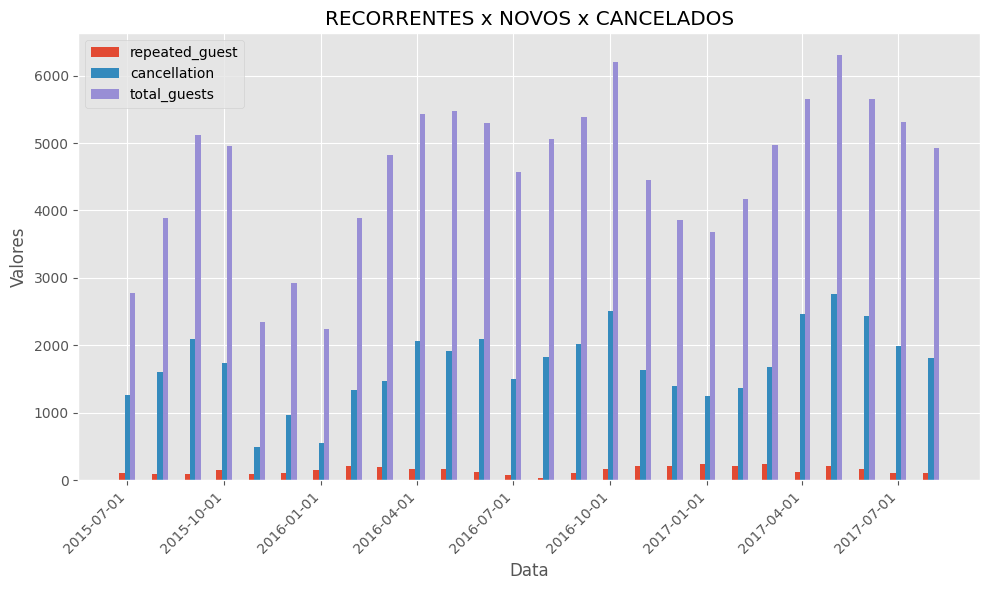

In [48]:
df_raw['month'] = df_raw['date'].dt.month
df_raw['year'] = df_raw['date'].dt.year

aux_graf = df_raw.groupby(['year','month']).agg({
    'cancellation':'sum',
    'repeated_guest':'sum',
    'type':'count'
    }).reset_index()

aux_graf = aux_graf.rename(columns={'type':'total_guests'})
aux_graf['date'] = pd.to_datetime(aux_graf[['year', 'month']].assign(DAY=1))
aux_graf = aux_graf[['date','total_guests','cancellation', 'repeated_guest']]

plt.style.use('ggplot')

# Configurações do gráfico de barras triplo
fig, ax = plt.subplots(figsize=(10, 6))

# Barras
ax.bar(aux_graf['date'] - pd.to_timedelta(5, unit='d'), aux_graf['repeated_guest'], width=5, align='center', label='repeated_guest')
ax.bar(aux_graf['date'], aux_graf['cancellation'], width=5, align='center', label='cancellation')
ax.bar(aux_graf['date'] + pd.to_timedelta(5, unit='d'), aux_graf['total_guests'], width=5, align='center', label='total_guests')

# Ajustando a formatação da data no eixo x
plt.xticks(rotation=45, ha='right')
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Adicionando legendas e rótulos
ax.legend()
ax.set_xlabel('Data')
ax.set_ylabel('Valores')
ax.set_title('RECORRENTES x NOVOS x CANCELADOS')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Considerações: Tem um certo padrão envolvido, como:
- Quedas em períodos como Dez, Jan e Fev
- Picos registrados sempre perto de Maio
- Out/2016 parece ser um outlier
- Variáveis como "repeated_guest" e "cancellation" parecem ser levemente inversamente proporcionais, sempre quando uma aumenta a outra diminui... Pode estar relacionado com a fidelização do cliente

Taxa de cancelamento por Variável

In [54]:
# Tipo de Quarto
aux_graf = df_raw.groupby(['type']).agg({
    'cancellation':'sum',
    'num_babies':'count'
    }).reset_index()

aux_graf = aux_graf.rename(columns={'num_babies':'total_guests'})
aux_graf['taxa_cancelamento'] = aux_graf['cancellation']/aux_graf['total_guests']
aux_graf

,type,cancellation,total_guests,taxa_cancelamento
0,Fancy Hotel,11122,40060,0.277634
1,Hotel,33102,79330,0.417270


In [57]:
# Criação da variável "has_baby_child" afim de ver se crianças e/ou bebes influenciam no cancelamento
df_raw['has_baby_child'] = np.where(
    (df_raw['num_babies'] > 0) | (df_raw['num_children'] > 0),
    1,
    0
)


aux_graf = df_raw.groupby(['has_baby_child']).agg({
    'cancellation':'sum',
    'type':'count'
    }).reset_index()

aux_graf = aux_graf.rename(columns={'type':'total_guests'})
aux_graf['taxa_cancelamento'] = aux_graf['cancellation']/aux_graf['total_guests']
aux_graf

,has_baby_child,cancellation,total_guests,taxa_cancelamento
0,0,40965,110058,0.372213
1,1,3259,9332,0.349228


In [58]:
# Se possui café da manhã incluso
aux_graf = df_raw.groupby(['breakfast']).agg({
    'cancellation':'sum',
    'type':'count'
    }).reset_index()

aux_graf = aux_graf.rename(columns={'type':'total_guests'})
aux_graf['taxa_cancelamento'] = aux_graf['cancellation']/aux_graf['total_guests']
aux_graf

,breakfast,cancellation,total_guests,taxa_cancelamento
0,0,9714,27080,0.358715
1,1,34510,92310,0.373849


In [63]:
# Quantidade de vezes que já se hospedou no hotel
aux_graf = df_raw.groupby(['num_previous_stays']).agg({
    'cancellation':'sum',
    'type':'count'
    }).reset_index()

aux_graf = aux_graf.rename(columns={'type':'total_guests'})
aux_graf['taxa_cancelamento'] = aux_graf['cancellation']/aux_graf['total_guests']
aux_graf

,num_previous_stays,cancellation,total_guests,taxa_cancelamento
0,0,44024,115770,0.380271
1,1,79,1542,0.051232
2,2,32,580,0.055172
3,3,17,333,0.051051
4,4,12,229,0.052402
...,...,...,...,...
68,68,0,1,0.000000
69,69,0,1,0.000000
70,70,0,1,0.000000
71,71,0,1,0.000000


Considerações: As variáveis que mais se destacaram em relação à taxa de cancelament foram:
- Pelo tipo de quarto, clientes que alugam quartos mais chiques não cancelam tão facilmente
- Pela quantidade de vezes que um cliente já se hospedou no hotel, tendo uma diferença muito grande ao olhar para um cliente que nunca se hospedou em comparação com clientes recorrentes, e que já conhecem o serviço feito. Isso é bom, já que evidencia a qualidade do serviço, onde pouquíssimas pessoas costumam cancelar já tendo hospedando uma vez.